Importación de librerías

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Configuración de semillas para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

print(f"Versión de TensorFlow: {tf.__version__}")

Versión de TensorFlow: 2.20.0


Preparación de los Datos (ecuación y=3x+5)

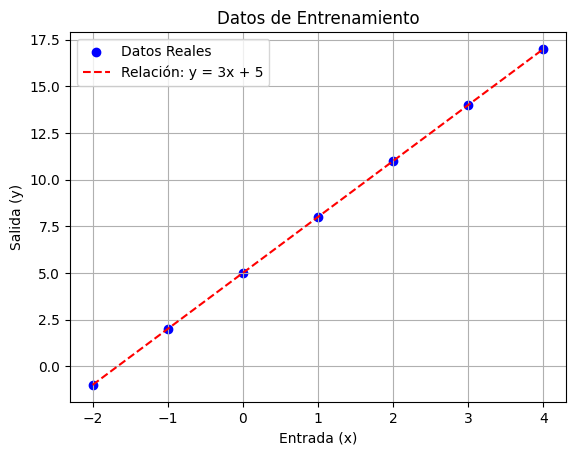

In [2]:
# Generamos los datos de entrada (X)
X_train = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# Generamos las salidas (y) siguiendo la ecuación y = 3x + 5
# Ejemplo: si x=2, y = 3(2) + 5 = 11
y_train = np.array([-1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0], dtype=float)

# Visualizamos los datos para confirmar la linealidad
plt.scatter(X_train, y_train, color='blue', label='Datos Reales')
plt.plot(X_train, y_train, color='red', linestyle='--', label='Relación: y = 3x + 5')
plt.xlabel('Entrada (x)')
plt.ylabel('Salida (y)')
plt.legend()
plt.title('Datos de Entrenamiento')
plt.grid(True)
plt.show()

Definición y Compilación del Modelo

In [3]:
# 1. Definir el modelo: Una red secuencial con una sola capa densa de 1 neurona
# input_shape=[1] porque le pasamos un solo valor (x)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# 2. Compilar el modelo
# Optimizer: SGD (Descenso de Gradiente Estocástico)
# Loss: Mean Squared Error (Error Cuadrático Medio) para medir qué tan lejos está la predicción
model.compile(optimizer='sgd', loss='mean_squared_error')

model.summary()

c:\Users\Miguel\Desktop\Miguelon\GH\Inteligencia_Artificial_Activities\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamiento (Variando los Epochs)

Iniciando entrenamiento...
Entrenamiento finalizado.


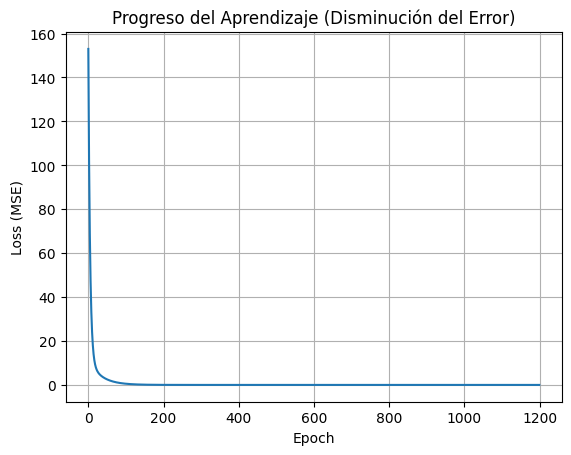

In [4]:
# Entrenamos el modelo
# Hemos cambiado epochs a 1200 (en el original eran 1000)
print("Iniciando entrenamiento...")
history = model.fit(X_train, y_train, epochs=1200, verbose=0)
print("Entrenamiento finalizado.")

# Visualizar la pérdida (loss) para ver cómo aprende la red
plt.plot(history.history['loss'])
plt.title('Progreso del Aprendizaje (Disminución del Error)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

Verificación de Resultados (Pesos y Sesgos)

In [6]:
# 1. Hacemos una predicción
# Si x = 10, la fórmula real es y = 3(10) + 5 = 35
x_nuevo = 10.0
prediccion = model.predict(np.array([[x_nuevo]]))  # 2D array: [[10.0]]

print(f"\n--- PRUEBA DE PREDICCIÓN ---")
print(f"Entrada: {x_nuevo}")
print(f"Valor esperado (Real): {3 * x_nuevo + 5}")
print(f"Predicción de la IA: {prediccion[0][0]}")

# 2. Verificar Pesos y Sesgos aprendidos
# La ecuación es y = mx + b  ->  y = 3x + 5
# El 'Peso' (weight) debería acercarse a 3
# El 'Sesgo' (bias) debería acercarse a 5

capa = model.layers[0]
pesos, sesgos = capa.get_weights()

print(f"\n--- ANÁLISIS DE LA ESTRUCTURA INTERNA ---")
print(f"Ecuación Objetivo: y = 3x + 5")
print(f"Peso (m) aprendido: {pesos[0][0]:.5f} (Debería ser cercano a 3)")
print(f"Sesgo (b) aprendido: {sesgos[0]:.5f} (Debería ser cercano a 5)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

--- PRUEBA DE PREDICCIÓN ---
Entrada: 10.0
Valor esperado (Real): 35.0
Predicción de la IA: 35.000022888183594

--- ANÁLISIS DE LA ESTRUCTURA INTERNA ---
Ecuación Objetivo: y = 3x + 5
Peso (m) aprendido: 3.00000 (Debería ser cercano a 3)
Sesgo (b) aprendido: 4.99998 (Debería ser cercano a 5)
